In [0]:
import pandas as pd
from sklearn import model_selection, preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.style.use('ggplot')
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('./MyDrive')

Drive already mounted at ./MyDrive; to attempt to forcibly remount, call drive.mount("./MyDrive", force_remount=True).


In [0]:
df = pd.read_json("./MyDrive/My Drive/ai/workspace/data/ny_apt_train.json")

In [0]:
df.loc[df["interest_level"] == "low", "interest_level"] = 0
df.loc[df["interest_level"] == "medium", "interest_level"] = 1
df.loc[df["interest_level"] == "high", "interest_level"] = 2

In [0]:
df['created'] = pd.to_datetime(df['created'])

df['year'] = df['created'].dt.year

df['month'] = df['created'].dt.month

df['day'] = df['created'].dt.day

df['week'] = df['created'].dt.week

df['hour'] = df['created'].dt.hour

df['weekday'] = df['created'].dt.weekday

In [0]:
df['num_photos'] = df['photos'].apply(len)

df['num_features'] = df['features'].apply(len)

In [7]:
df['building_id'].value_counts()

0                                   8286
96274288c84ddd7d5c5d8e425ee75027     275
11e1dec9d14b1a9e528386a2504b3afc     215
80a120d6bc3aba97f40fee8c2204524b     213
bb8658a3e432fb62a440615333376345     212
                                    ... 
96567fe846e6f5fcd396106741a0bf47       1
8e892ce8ede5d28e1b898d8fa1ee4773       1
8a8a007d828ee16b3bcfe0933edd8b0e       1
0cb1cc30e694c217e9c797fd57998aaa       1
2207347149c9d445c10bf00ac6aa4497       1
Name: building_id, Length: 7585, dtype: int64

In [8]:
df

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level,year,month,day,week,hour,weekday,num_photos,num_features
4,1.0,1,8579a0b0d54db803821a35a4a615e97a,2016-06-16 05:55:27,Spacious 1 Bedroom 1 Bathroom in Williamsburg!...,145 Borinquen Place,"[Dining Room, Pre-War, Laundry in Building, Di...",40.7108,7170325,-73.9539,a10db4590843d78c784171a107bdacb4,[https://photos.renthop.com/2/7170325_3bb5ac84...,2400,145 Borinquen Place,1,2016,6,16,24,5,3,12,7
6,1.0,2,b8e75fc949a6cd8225b455648a951712,2016-06-01 05:44:33,BRAND NEW GUT RENOVATED TRUE 2 BEDROOMFind you...,East 44th,"[Doorman, Elevator, Laundry in Building, Dishw...",40.7513,7092344,-73.9722,955db33477af4f40004820b4aed804a0,[https://photos.renthop.com/2/7092344_7663c19a...,3800,230 East 44th,0,2016,6,1,22,5,2,6,6
9,1.0,2,cd759a988b8f23924b5a2058d5ab2b49,2016-06-14 15:19:59,**FLEX 2 BEDROOM WITH FULL PRESSURIZED WALL**L...,East 56th Street,"[Doorman, Elevator, Laundry in Building, Laund...",40.7575,7158677,-73.9625,c8b10a317b766204f08e613cef4ce7a0,[https://photos.renthop.com/2/7158677_c897a134...,3495,405 East 56th Street,1,2016,6,14,24,15,1,6,6
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue,1,2016,6,24,25,7,4,5,0
15,1.0,0,bfb9405149bfff42a92980b594c28234,2016-06-28 03:50:23,Over-sized Studio w abundant closets. Availabl...,East 34th Street,"[Doorman, Elevator, Fitness Center, Laundry in...",40.7439,7225292,-73.9743,2c3b41f588fbb5234d8a1e885a436cfa,[https://photos.renthop.com/2/7225292_901f1984...,2795,340 East 34th Street,0,2016,6,28,26,3,1,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124000,1.0,3,92bbbf38baadfde0576fc496bd41749c,2016-04-05 03:58:33,There is 700 square feet of recently renovated...,W 171 Street,"[Elevator, Dishwasher, Hardwood Floors]",40.8433,6824800,-73.9396,a61e21da3ba18c7a3d54cfdcc247e1f8,[https://photos.renthop.com/2/6824800_0682be16...,2800,620 W 171 Street,0,2016,4,5,14,3,1,5,3
124002,1.0,2,5565db9b7cba3603834c4aa6f2950960,2016-04-02 02:25:31,"2 bedroom apartment with updated kitchen, rece...",Broadway,"[Common Outdoor Space, Cats Allowed, Dogs Allo...",40.8198,6813268,-73.9578,8f90e5e10e8a2d7cf997f016d89230eb,[https://photos.renthop.com/2/6813268_1e6fcc32...,2395,3333 Broadway,1,2016,4,2,13,2,5,5,7
124004,1.0,1,67997a128056ee1ed7d046bbb856e3c7,2016-04-26 05:42:03,No Brokers Fee * Never Lived 1 Bedroom 1 Bathr...,210 Brighton 15th St,"[Dining Room, Elevator, Pre-War, Laundry in Bu...",40.5765,6927093,-73.9554,a10db4590843d78c784171a107bdacb4,[https://photos.renthop.com/2/6927093_93a52104...,1850,210 Brighton 15th St,1,2016,4,26,17,5,1,3,11
124008,1.0,2,3c0574a740154806c18bdf1fddd3d966,2016-04-19 02:47:33,Wonderful Bright Chelsea 2 Bedroom apartment o...,West 21st Street,"[Pre-War, Laundry in Unit, Dishwasher, No Fee,...",40.7448,6892816,-74.0017,c3cd45f4381ac371507090e9ffabea80,[https://photos.renthop.com/2/6892816_1a8d087a...,4195,350 West 21st Street,1,2016,4,19,16,2,1,5,5


In [9]:
df['building_id'].value_counts()

0                                   8286
96274288c84ddd7d5c5d8e425ee75027     275
11e1dec9d14b1a9e528386a2504b3afc     215
80a120d6bc3aba97f40fee8c2204524b     213
bb8658a3e432fb62a440615333376345     212
                                    ... 
96567fe846e6f5fcd396106741a0bf47       1
8e892ce8ede5d28e1b898d8fa1ee4773       1
8a8a007d828ee16b3bcfe0933edd8b0e       1
0cb1cc30e694c217e9c797fd57998aaa       1
2207347149c9d445c10bf00ac6aa4497       1
Name: building_id, Length: 7585, dtype: int64

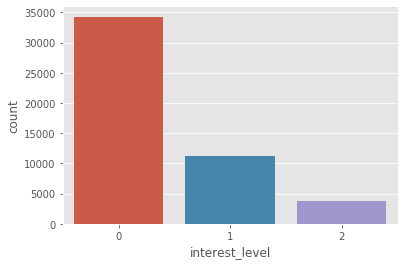

In [10]:
sns.countplot(x="interest_level", data=df)

In [11]:
df.groupby('interest_level').mean()

,bathrooms,bedrooms,latitude,listing_id,longitude,price,year,month,day,week,hour,weekday,num_photos,num_features
interest_level,,,,,,,,,,,,,,
0,1.238741,1.514759,40.739504,7.026373e+06,-73.951667,4176.599142,2016.0,5.018697,15.384465,19.623498,4.331029,2.930930,5.524647,5.307957
1,1.163906,1.622050,40.745567,7.019098e+06,-73.965033,3158.767388,2016.0,5.003117,14.959480,19.499866,5.514382,2.893401,5.813251,5.888681
2,1.116176,1.546496,40.748007,7.017844e+06,-73.964613,2700.293045,2016.0,5.014848,14.344621,19.458453,6.444647,2.927585,5.738474,5.158635


In [12]:
pd.crosstab(df['bathrooms'], df['interest_level'], normalize='index')

interest_level,0,1,2
bathrooms,,,
0.0,0.977636,0.019169,0.003195
1.0,0.674268,0.239156,0.086576
1.5,0.937984,0.062016,0.000000
2.0,0.726632,0.220235,0.053133
2.5,0.989170,0.010830,0.000000
3.0,0.900671,0.080537,0.018792
3.5,1.000000,0.000000,0.000000
4.0,0.943396,0.031447,0.025157
4.5,1.000000,0.000000,0.000000


In [13]:
qq = pd.crosstab(df['manager_id'], df['interest_level'])
qq['sum'] = qq[0] + qq[1]+qq[2]
qq.sort_values(by=['sum'], ascending=False)

interest_level,0,1,2,sum
manager_id,,,,
e6472c7237327dd3903b3d6f6a94515a,1739,622,172,2533
6e5c10246156ae5bdcd9b487ca99d96a,644,63,4,711
8f5a9c893f6d602f4953fcc0b8e6e9b4,405,4,1,410
62b685cc0d876c3a1a51d63a0d6a8082,402,0,0,402
cb87dadbca78fad02b388dc9e8f25a5b,135,183,55,373
...,...,...,...,...
918acb34f159aeefe0b829a53ed6179c,1,0,0,1
916668a9ae4b9a3eeb2356c0c15d0384,1,0,0,1
9109b784e9f37346d6ac176e02e340da,1,0,0,1


In [14]:
pd.crosstab(df['num_features'], df['interest_level'], normalize='index')

interest_level,0,1,2
num_features,,,
0,0.651958,0.227470,0.120572
1,0.712903,0.202535,0.084562
2,0.698663,0.210207,0.091130
3,0.736435,0.189019,0.074545
4,0.730170,0.198571,0.071258
5,0.726413,0.206950,0.066637
6,0.691525,0.234159,0.074316
7,0.691464,0.247481,0.061055
8,0.668310,0.264789,0.066901


## 방당 가격 추가
## 별로 의미는 없는 듯함
## 로그를 취할 경우 price를 포함한 3개의 히스토그램이 같은 모양

In [15]:
df['each_price'] = df['price'] / (df['bedrooms'] + df['bathrooms'] + 1)
df['each_price']

4          800.000000
6          950.000000
9          873.750000
10         545.454545
15        1397.500000
             ...     
124000     560.000000
124002     598.750000
124004     616.666667
124008    1048.750000
124009     856.000000
Name: each_price, Length: 49352, dtype: float64

## 화장실 개수 + 침실 개수

In [16]:
df['room_num'] = np.log(df['bedrooms'] + df['bathrooms'] + 1)
df['room_num']

4         1.098612
6         1.386294
9         1.386294
10        1.704748
15        0.693147
            ...   
124000    1.609438
124002    1.386294
124004    1.098612
124008    1.386294
124009    1.609438
Name: room_num, Length: 49352, dtype: float64

(array([1.5700e+02, 0.0000e+00, 9.3520e+03, 9.0000e+00, 1.5543e+04,
        1.1310e+04, 1.0642e+04, 2.0280e+03, 2.9900e+02, 1.2000e+01]),
 array([0.        , 0.26741486, 0.53482973, 0.80224459, 1.06965946,
        1.33707432, 1.60448919, 1.87190405, 2.13931892, 2.40673378,
        2.67414865]),
 <a list of 10 Patch objects>)

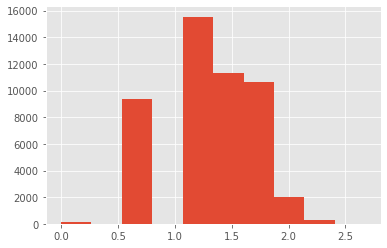

In [17]:
plt.hist(df['room_num'])

## X와 Y 나누기

In [18]:
y = df['interest_level']
df = df.drop(['interest_level'], axis=1)
df

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,year,month,day,week,hour,weekday,num_photos,num_features,each_price,room_num
4,1.0,1,8579a0b0d54db803821a35a4a615e97a,2016-06-16 05:55:27,Spacious 1 Bedroom 1 Bathroom in Williamsburg!...,145 Borinquen Place,"[Dining Room, Pre-War, Laundry in Building, Di...",40.7108,7170325,-73.9539,a10db4590843d78c784171a107bdacb4,[https://photos.renthop.com/2/7170325_3bb5ac84...,2400,145 Borinquen Place,2016,6,16,24,5,3,12,7,800.000000,1.098612
6,1.0,2,b8e75fc949a6cd8225b455648a951712,2016-06-01 05:44:33,BRAND NEW GUT RENOVATED TRUE 2 BEDROOMFind you...,East 44th,"[Doorman, Elevator, Laundry in Building, Dishw...",40.7513,7092344,-73.9722,955db33477af4f40004820b4aed804a0,[https://photos.renthop.com/2/7092344_7663c19a...,3800,230 East 44th,2016,6,1,22,5,2,6,6,950.000000,1.386294
9,1.0,2,cd759a988b8f23924b5a2058d5ab2b49,2016-06-14 15:19:59,**FLEX 2 BEDROOM WITH FULL PRESSURIZED WALL**L...,East 56th Street,"[Doorman, Elevator, Laundry in Building, Laund...",40.7575,7158677,-73.9625,c8b10a317b766204f08e613cef4ce7a0,[https://photos.renthop.com/2/7158677_c897a134...,3495,405 East 56th Street,2016,6,14,24,15,1,6,6,873.750000,1.386294
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue,2016,6,24,25,7,4,5,0,545.454545,1.704748
15,1.0,0,bfb9405149bfff42a92980b594c28234,2016-06-28 03:50:23,Over-sized Studio w abundant closets. Availabl...,East 34th Street,"[Doorman, Elevator, Fitness Center, Laundry in...",40.7439,7225292,-73.9743,2c3b41f588fbb5234d8a1e885a436cfa,[https://photos.renthop.com/2/7225292_901f1984...,2795,340 East 34th Street,2016,6,28,26,3,1,4,4,1397.500000,0.693147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124000,1.0,3,92bbbf38baadfde0576fc496bd41749c,2016-04-05 03:58:33,There is 700 square feet of recently renovated...,W 171 Street,"[Elevator, Dishwasher, Hardwood Floors]",40.8433,6824800,-73.9396,a61e21da3ba18c7a3d54cfdcc247e1f8,[https://photos.renthop.com/2/6824800_0682be16...,2800,620 W 171 Street,2016,4,5,14,3,1,5,3,560.000000,1.609438
124002,1.0,2,5565db9b7cba3603834c4aa6f2950960,2016-04-02 02:25:31,"2 bedroom apartment with updated kitchen, rece...",Broadway,"[Common Outdoor Space, Cats Allowed, Dogs Allo...",40.8198,6813268,-73.9578,8f90e5e10e8a2d7cf997f016d89230eb,[https://photos.renthop.com/2/6813268_1e6fcc32...,2395,3333 Broadway,2016,4,2,13,2,5,5,7,598.750000,1.386294
124004,1.0,1,67997a128056ee1ed7d046bbb856e3c7,2016-04-26 05:42:03,No Brokers Fee * Never Lived 1 Bedroom 1 Bathr...,210 Brighton 15th St,"[Dining Room, Elevator, Pre-War, Laundry in Bu...",40.5765,6927093,-73.9554,a10db4590843d78c784171a107bdacb4,[https://photos.renthop.com/2/6927093_93a52104...,1850,210 Brighton 15th St,2016,4,26,17,5,1,3,11,616.666667,1.098612
124008,1.0,2,3c0574a740154806c18bdf1fddd3d966,2016-04-19 02:47:33,Wonderful Bright Chelsea 2 Bedroom apartment o...,West 21st Street,"[Pre-War, Laundry in Unit, Dishwasher, No Fee,...",40.7448,6892816,-74.0017,c3cd45f4381ac371507090e9ffabea80,[https://photos.renthop.com/2/6892816_1a8d087a...,4195,350 West 21st Street,2016,4,19,16,2,1,5,5,1048.750000,1.386294


## 테스트와 트레인 나누기

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state = 1234)
y_train=np.array (y_train, dtype="float32")
y_train

array([0., 0., 2., ..., 0., 0., 0.], dtype=float32)

## 주소 빈도수에 따른 처리

In [20]:
X_train['display_address']

100814             W 12 Street
1886               E 78 Street
4013      Ft Washington Avenue
111847                West st 
105665        West 53rd Street
                  ...         
81421              E 73 Street
42948          EAST 8TH STREET
60140         West 45th Street
85578               E 94th St.
69052              W 16 Street
Name: display_address, Length: 39481, dtype: object

In [21]:
keys = X_train['display_address'].value_counts()
keys

Broadway                 338
Second Avenue            291
Wall Street              281
East 34th Street         276
West 37th Street         234
                        ... 
west 152nd street          1
48 STUYVESANT STREET       1
W Houston St,              1
301 East 110th Street      1
W 84th St                  1
Name: display_address, Length: 7691, dtype: int64

In [22]:
keys = X_train['display_address'].value_counts().sort_values(ascending=False)
keys[(keys >= keys.quantile(0.90))]

Broadway            338
Second Avenue       291
Wall Street         281
East 34th Street    276
West 37th Street    234
                   ... 
Lorimer Street        9
Keap Street           9
Ave. B                9
East 64th Street      9
Sherman Ave           9
Name: display_address, Length: 835, dtype: int64

In [23]:
rate = 0.85
keys.quantile(rate)

6.0

In [24]:
keys = X_train['display_address'].value_counts()
keys

Broadway                 338
Second Avenue            291
Wall Street              281
East 34th Street         276
West 37th Street         234
                        ... 
west 152nd street          1
48 STUYVESANT STREET       1
W Houston St,              1
301 East 110th Street      1
W 84th St                  1
Name: display_address, Length: 7691, dtype: int64

In [25]:
keys = X_train['display_address'].value_counts()
sz = len(np.where(np.array(keys, dtype="float32")>=keys.quantile(rate))[0]) + 2
X_train['kkk']= np.zeros(len(X_train), dtype="float32") +  sz
for idx, k in enumerate(keys.keys()):
    if keys.loc[k] <= keys.quantile(rate):
        break
    else:
        X_train.loc[ X_train['display_address'] == k , 'kkk'] =  idx+1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [26]:
X_train['kkk'] = np.log(X_train['kkk'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


(array([  629.,   557.,   836.,  1346.,  2373.,  3222.,  4512.,  5548.,
         5805., 14653.]),
 array([0.        , 0.70553124, 1.4110625 , 2.1165938 , 2.822125  ,
        3.5276563 , 4.2331877 , 4.938719  , 5.64425   , 6.3497815 ,
        7.0553126 ], dtype=float32),
 <a list of 10 Patch objects>)

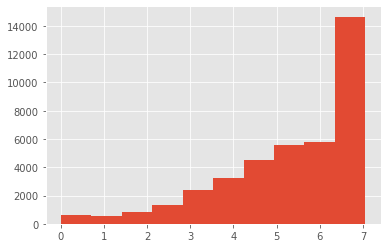

In [27]:
plt.hist(X_train['kkk'])

In [28]:
y_train = y_train.reshape(-1, 1)
y_train

enc = preprocessing.OneHotEncoder()
enc.fit(y_train)
y_train = enc.transform(y_train).toarray()
y_train

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

## price 로그 취하기

In [29]:
X_train.loc[:, ['price', 'each_price']] = np.log(X_train.loc[:, ['price', 'each_price']])

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


## 데이터 표준화

In [30]:
features_to_use = ['bathrooms',	'bedrooms', 'latitude', 'longitude',
                   'price','day', 'week', 'hour', 'weekday', 'num_photos', 'num_features', 'kkk', 'each_price']
features_to_use

X_train = X_train[features_to_use]
X_train = np.array(X_train[features_to_use], dtype="float32")
X_train

array([[ 2.       ,  2.       , 40.7373   , ...,  6.       ,  6.7499313,
         7.002156 ],
       [ 1.       ,  2.       , 40.77     , ...,  2.       ,  4.9416423,
         6.523929 ],
       [ 1.       ,  1.       , 40.8573   , ...,  5.       ,  7.0553126,
         6.4769726],
       ...,
       [ 1.       ,  0.       , 40.7601   , ...,  3.       ,  3.3322046,
         6.9077554],
       [ 1.       ,  2.       , 40.7826   , ...,  9.       ,  6.8480053,
         6.6184053],
       [ 1.       ,  1.       , 40.7391   , ...,  2.       ,  6.1800165,
         6.838405 ]], dtype=float32)

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [0]:
X_train = scaler.transform(X_train)

(array([27443.,     0.,     0.,     0.,     0.,  8974.,     0.,     0.,
            0.,  3064.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

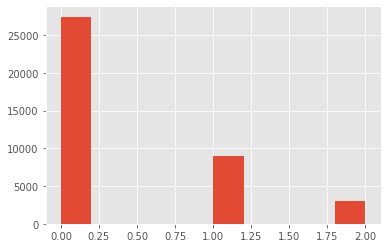

In [33]:
xx = np.argmax(y_train, 1)
plt.hist(xx)

In [34]:
zz = len(xx)/np.sum(xx==0)
zz

1.4386546660350545

In [35]:
(len(xx)/np.sum(xx==1))/zz

3.0580566079786045

In [36]:
(len(xx)/np.sum(xx==2))/zz

8.95659268929504

In [0]:
# from keras import backend as K
def my_func(a):
    return np.array([a[0], a[1] * 3., a[2] * 9 ], dtype="float32")
y_train = np.apply_along_axis(my_func, 1, y_train)


In [0]:
#  def custom_loss(y_true, y_pred):
#     cost = -K.sum(K.sum(y_true * K.log(np.apply_along_axis(my_func, 1, y_train)))) / y_true.shape[0]

#     return cost

## 필요한 데이터만 가져오기

## 오버샘플링

In [0]:
# # BorderlineSMOTE
# from imblearn.over_sampling import BorderlineSMOTE

# X_train, y_train = BorderlineSMOTE().fit_resample(X_train, y_train)
# # print(sorted(Counter(y_resampled).items()))

# importing ADASYN
# from imblearn.over_sampling import ADASYN

# # applying ADASYN
# X_train, y_train = ADASYN().fit_resample(X_train, y_train)

# from imblearn.over_sampling import SMOTENC

# # applying SMOTE to our data and checking the class counts
# X_train, y_train = SMOTENC(categorical_features=[0, 1, 2], random_state=1234).fit_resample(X_train, y_train)

## 딥러닝 학습

In [40]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

Using TensorFlow backend.


In [41]:
model = Sequential()

model.add(Dense(200, input_dim=X_train.shape[1] , activation="relu"))

model.add(Dense(100,  activation="relu"))

model.add(Dense(3,  activation="softmax"))

In [42]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 200)               2800      
_________________________________________________________________
dense_2 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 303       
Total params: 23,203
Trainable params: 23,203
Non-trainable params: 0
_________________________________________________________________


In [43]:
model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=0.001), metrics=['acc'])
# model.compile(loss=custom_loss, optimizer=Adam(lr=0.001), metrics=['acc'])

model.fit(X_train, y_train, batch_size=100, epochs=500)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/500





39481/39481 [==============================] - 2s 59us/step - loss: 1.9386 - acc: 0.5635
Epoch 2/500
39481/39481 [==============================] - 2s 38us/step - loss: 1.8732 - acc: 0.5691
Epoch 3/500
39481/39481 [==============================] - 1s 33us/step - loss: 1.8504 - acc: 0.5783
Epoch 4/500
39481/39481 [==============================] - 1s 32us/step - loss: 1.8359 - acc: 0.5790
Epoch 5/500
39481/39481 [==============================] - 1s 35us/step - loss: 1.8210 - acc: 0.5890
Epoch 6/500
39481/39481 [==============================] - 1s 35us/step - loss: 1.8108 - acc: 0.5895
Epoch 7/500
39481/39481 [==============================] - 1s 33us/step - loss: 1.7985 - acc: 0.5912
Epoch 8/500
39481/39481 [==============================] - 1s 35us/step - loss: 1.7902 - acc: 0.5984
Epoch 9/500
39481/39481 [==============================] - 1s 36us/step - loss: 1.7795 -

## 테스트셋 확인

In [53]:
X_test['kkk']= np.zeros(len(X_test), dtype="float32") +  sz
for idx, k in enumerate(keys.keys()):
    if keys.loc[k] <= keys.quantile(rate):
        break
    else:
        X_test.loc[ X_test['display_address'] == k , 'kkk'] =  idx+1


IndexError: ignored

In [45]:
X_test['kkk'] = np.log(X_test['kkk'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [46]:
y_test = np.array(y_test, dtype="float32")
y_test = y_test.reshape(-1, 1)
y_test_onehot = enc.transform(y_test).toarray()
y_test_onehot

array([[0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [47]:
X_test['price'] = np.log(X_test['price'])
X_test['each_price'] = np.log(X_test['each_price'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [48]:
features_to_use = ['bathrooms',	'bedrooms', 'latitude', 'longitude',
                   'price','day', 'week', 'hour', 'weekday', 'num_photos', 'num_features', 'kkk', 'each_price']
features_to_use

X_test = X_test[features_to_use]
X_test = np.array(X_test[features_to_use], dtype="float32")
X_test

array([[ 1.       ,  2.       , 40.7928   , ..., 10.       ,  6.025866 ,
         6.7001157],
       [ 2.5      ,  2.       , 40.7634   , ..., 10.       ,  5.379897 ,
         7.5848656],
       [ 1.       ,  2.       , 40.8644   , ...,  7.       ,  7.0553126,
         6.263398 ],
       ...,
       [ 1.       ,  0.       , 40.7225   , ...,  4.       ,  7.0553126,
         6.9077554],
       [ 1.       ,  0.       , 40.7239   , ...,  7.       ,  6.6656837,
         7.109062 ],
       [ 1.       ,  3.       , 40.7255   , ...,  3.       ,  6.9186954,
         6.897705 ]], dtype=float32)

In [0]:
X_test = scaler.transform(X_test)

In [50]:
predict = model.predict(X_test)
predict01 = np.argmax(predict, 1)
target = np.argmax(y_test_onehot, 1)
predict02 = (predict01 == target)
acc = np.sum(predict02)/ len(predict02)
acc

0.6320534900212744

(array([5778.,    0.,    0.,    0.,    0., 3132.,    0.,    0.,    0.,
         961.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

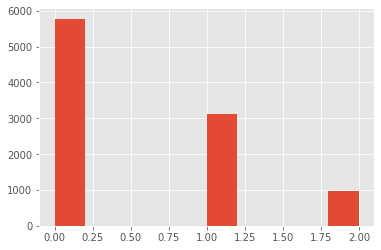

In [51]:
plt.hist(predict01)

(array([6841.,    0.,    0.,    0.,    0., 2255.,    0.,    0.,    0.,
         775.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

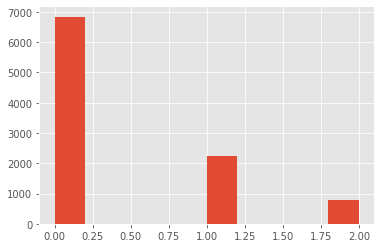

In [52]:
plt.hist(target)